<a href="https://colab.research.google.com/github/nihaalll/CodeClauseInternship_Handwritten_Digit_Recognition/blob/main/CodeClauseInternship_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 30ms/step - accuracy: 0.8918 - loss: 0.3350 - val_accuracy: 0.9860 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9842 - loss: 0.0491 - val_accuracy: 0.9876 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9891 - loss: 0.0354 - val_accuracy: 0.9870 - val_loss: 0.0408
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9904 - val_loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9904 - val_loss: 0.0319
313/313 - 2s - 8ms/step - accuracy: 0.9904 - loss: 0.0319

Test accuracy: 0.9904000163078308
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


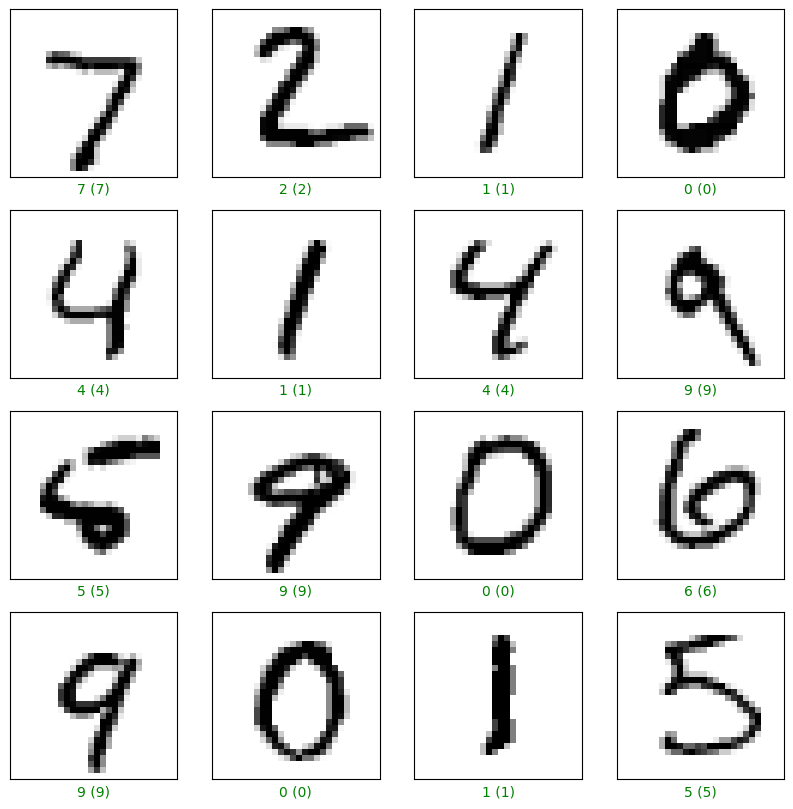

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5,
          validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()
